# Проверка гипотез в бизнесе
В этом проекте вы попробуете себя в роли аналитика крупного сервиса проката самокатов GoFast. Компания предоставила три датасета с данными о пользователях сервиса, их поездках за один год, а также стоимости услуг в подписках. Вас просят проанализировать демографию пользователей и особенности использования самокатов, а также определить возможную выгоду от распространения платной подписки на самокаты.

# Описание данных

Таблица с пользователями `users_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `name` — имя пользователя.

- `age` — возраст.

- `city` — город.

- `subscription_type` — тип подписки: `free`, `ultra`.

Таблица с поездками `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `distance` — расстояние в метрах, которое пользователь проехал в текущей сессии.

- `duration` — продолжительность сессии в минутах, то есть время с того момента, как пользователь нажал кнопку «Начать поездку», до того, как он нажал кнопку «Завершить поездку».

- `date` — дата совершения поездки.

Таблица с подписками `subscriptions_go.csv`

- `subscription_type` — тип подписки.

- `minute_price` — стоимость одной минуты поездки по этой подписке.

- `start_ride_price` — стоимость начала поездки.

- `subscription_fee` — стоимость ежемесячного платежа.

---
## Задание 1. Загрузка данных
На первом этапе загрузите все необходимые данные и познакомьтесь с содержанием таблиц.

### Задача 1.1 Импорт библиотеки pandas
Импортируйте библиотеку pandas с сокращением `pd`.

In [2]:
import pandas as pd

### Задача 1.2 Чтение данных
Cчитайте и сохраните в отдельные датафреймы три CSV-файла. Датафреймы назовите в соответствии с названиями файлов, добавив префикс `df_`, например `df_users_go`. Для доступа к файлам используйте следующие ссылки:

- https://code.s3.yandex.net/datasets/users_go.csv
- https://code.s3.yandex.net/datasets/rides_go.csv
- https://code.s3.yandex.net/datasets/subscriptions_go.csv

In [3]:
df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

### Задача 1.3 Печать первых строк
Выведите первые пять строк каждого датафрейма. Познакомьтесь с содержанием таблиц.

<details>
<summary>Открыть подсказку</summary>
Чтобы распечатать несколько датафреймов в одной ячейке, можно воспользоваться функцией <code>display()</code>.
</details>

In [4]:
display(df_users_go.head())
display(df_rides_go.head())
display(df_subscriptions_go.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Задача 1.4 Подсчёт строк
Определите количество строк в каждом из трёх датафреймов. Это поможет оценить объём данных и выявить аномалии, например слишком малое количество записей. В качестве ответа запишите три целых числа в одну строку через пробел.

In [5]:
rows_users = len(df_users_go)
rows_rides = len(df_rides_go)
rows_subscriptions = len(df_subscriptions_go)

print(rows_users, rows_rides, rows_subscriptions)

1565 18068 2


---
## Задание 2. Знакомство с данными и их предварительная подготовка

Прежде чем начать анализ, важно убедиться в качестве предоставленных данных. Выполните несколько шагов, чтобы лучше понять структуру и устранить потенциальные проблемы в таблицах.

### Задача 2.1 Определение типов данных
В датафрейме `df_rides_go` выведите типы данных каждой колонки стандартным атрибутом `dtypes`. Так вы проверите корректность типов и подготовите данные для дальнейшей обработки.

In [6]:
df_rides_go.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

### Задача 2.2 Преобразование формата даты
Приведите столбец `date` в датафрейме `df_rides_go` к типу даты pandas, используя метод `pd.to_datetime()`, изученный вами в одном из прошлых спринтов. Этот шаг упростит работу с временными данными.

In [7]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])
df_rides_go.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

### Задача 2.3 Создание столбца с месяцем
На основе столбца `date` создайте новый столбец `month`, содержащий номер месяца. Это нужно для последующей группировки данных и анализа сезонных трендов.

In [8]:
df_rides_go['month'] = df_rides_go['date'].dt.month

In [9]:
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Задача 2.4 Поиск дублей и пропусков
В датафрейме пользователей `df_users_go` определите количество пропусков и дубликатов. Это необходимо для понимания полноты и уникальности данных пользователей. Ответ выведите в виде двух целых чисел, разделённых пробелом. Например: `10 20`.

In [10]:
missing_values = df_users_go.isnull().sum().sum()  # Общее количество пропусков
duplicates = df_users_go.duplicated().sum()  # Количество полных дубликатов

print(missing_values, duplicates)

0 31


### Задача 2.5 Заполнение пропусков и удаление дублей
При наличии пропущенных значений заполните их нулями, а все дубликаты удалите. Это шаг необходим для улучшения качества данных, что является ключевым для точного анализа. Все операции проводите с созданными в рамках задачи 1 датафреймами.

<details>
<summary>Открыть подсказку</summary>
Внимательно изучите результаты предыдущих шагов и определите, какие датасеты вам понадобятся.
</details>

In [11]:
df_users_go = df_users_go.drop_duplicates()

In [12]:
df_rides_go = df_rides_go.fillna(0)
df_subscriptions_go = df_subscriptions_go.fillna(0)

In [13]:
print(df_users_go.duplicated().sum())  
print(df_rides_go.isnull().sum().sum()) 
print(df_subscriptions_go.isnull().sum().sum())

0
0
0


### Задача 2.6 Округление длительности поездки
В датафрейме поездок `df_rides_go` округлите время поездки `duration` до целого числа стандартным методом `round()`. Затем приведите эту колонку к целочисленному типу `int`. Этот шаг затем поможет вам правильно рассчитать прибыль, так как плата взимается только за целое число минут.

In [14]:
df_rides_go['duration'] = df_rides_go['duration'].round().astype(int)

---
## Задание 3. Исследовательский анализ данных (EDA)
Исследовательский анализ данных — неотъемлемая часть работы аналитика. В этом задании вы внимательнее изучите и визуализируете информацию о географии и демографии сервиса, а также лучше поймёте закономерности в дистанциях и длительности поездок.


### Задача 3.1 Импорт библиотеки matplotlib
Импортируйте библиотеку matplotlib.pyplot с сокращением `plt`.

In [15]:
import matplotlib.pyplot as plt

### Задача 3.2 Количество пользователей по городам.
Пользуясь данными из датафрейма `df_users_go`, изучите количество пользователей в каждом из городов. Создайте и выведите на экран объект `pd.Series`, названный `users_by_city_count`, с одной колонкой `count` — суммарным количеством пользователей в каждом городе `city`, отсортированным по убыванию.

<details>
<summary>Открыть подсказку</summary>
В этом задании можно воспользоваться методом <code>value_counts()</code>.
</details>

In [16]:
users_by_city_count = df_users_go['city'].value_counts()
print(users_by_city_count)

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


### Задача 3.3 Количество пользователей подписки
Создайте и выведите на экран серию `subscription_type_count` с количеством пользователей для каждого типа подписки `subscription_type`.

<details>
<summary>Открыть подсказку</summary>
В этом задании можно воспользоваться методом <code>value_counts()</code>.
</details>

In [17]:
subscription_type_count = df_users_go['subscription_type'].value_counts()
print(subscription_type_count)

free     835
ultra    699
Name: subscription_type, dtype: int64


### Задача 3.4 Круговая диаграмма
Постройте круговую диаграмму, указав процент пользователей с `free` и `ultra` подпиской. Вызовите метод `plot()` для серии `subscription_type_count` с указанием нужного аргумента для построения круговой диаграммы.

Затем добавьте следующее:
- **Заголовок.** Установите заголовок с помощью параметра `title`, задав его как `'Соотношение пользователей с подпиской и без подписки'`.
- **Процентные метки.** Используйте параметр `autopct='%.0f%%'` для отображения процентных значений на диаграмме. Достаточно передать аргумент в указанном виде методу `plot()`. Процентные метки часто хорошо дополняют круговые диаграммы.
- **Подпись оси Y.** Установите пустую строку для подписи оси Y `(ylabel='')`, чтобы она не отображалась.
- **Цвета секторов.** Используйте параметр `colors`, задав красный цвет `red` для пользователей без подписки и зелёный `green` для подписчиков.

Затем вызовите `plt.show()` для отображения диаграммы.

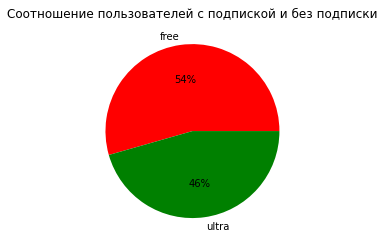

In [18]:
subscription_type_count.plot(
    kind= 'pie',
    title='Соотношение пользователей с подпиской и без подписки',
    autopct= '%.0f%%',
    ylabel= '',
    colors=['red', 'green']
)

plt.show()

### Задача 3.5 Гистограмма возрастов
Постройте гистограмму возрастов `age` пользователей самокатов. Используйте количество бинов, равное разности максимального и минимального значений возраста.

Что нужно сделать:

1. Определить количество бинов `n_bins` как разницу между максимальным и минимальным значениями в столбце `age`.
2. Использовать метод `hist()` для столбца `df_users_go['age']`.
3. Установить количество бинов через параметр `bins=n_bins`.
4. Назначить заголовок графика как `'Возраст пользователей'` с помощью `plt.title()`.
5. Установить подпись оси X как `'Возраст'` с помощью `plt.xlabel()`.
6. Вызвать `plt.show()` для визуального отображения гистограммы.

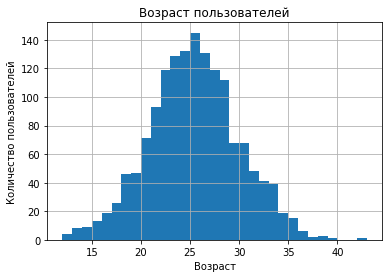

In [19]:
n_bins = df_users_go['age'].max() - df_users_go['age'].min()

df_users_go['age'].hist(bins=n_bins)

plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

plt.show()

### Задача 3.6 Несовершеннолетние пользователи
Рассчитайте долю несовершеннолетних (возрастом менее 18 лет) пользователей самокатов.

<details>
<summary>Открыть подсказку</summary>
Для начала необходимо рассчитать количество пользователей младше 18 лет — для этого вспомните принцип использования логических масок в pandas. Затем полученное значение следует разделить на количество строк в таблице. Получить его можно, например, из кортежа, который выдаёт атрибут <code>shape</code>.
</details>

In [20]:
# Количество несовершеннолетних пользователей
users_under_18 = (df_users_go['age'] < 18).sum()

# Общее количество пользователей
total_users = df_users_go.shape[0]

In [21]:
users_under_18_ratio = int(round(100 * (users_under_18 / total_users)))
print(f'Доля несовершеннолетних пользователей самокатов составляет {users_under_18_ratio}%.')

Доля несовершеннолетних пользователей самокатов составляет 5%.


### Задача 3.7 Характеристики длительности поездки
Длительность поездки является важной метрикой в работе сервиса проката самокатов. Если средняя длительность поездок будет слишком высокой, самокаты будут быстрее выходить из строя. Если слишком низкой, значит, клиентам что-то не нравится в сервисе.

В этом задании с помощью описательной статистики вы изучите длительность поездок:

1. Используйте колонку `duration` из датафрейма `df_rides_go`.
2. Расчитайте среднее значение и стандартное отклонение длительности поездки. Для расчёта стандартного отклонения можно воспользоваться методом `std()`.
3. Рассчитайте 25-й и 75-й процентили длительности поездки.
4. Выведите на экран ответ по предложенному шаблону.

Используя шаблон, сформулируйте и выведите текстовый вывод о средней длительности поездки, а также о 25-м и 75-м процентилях длительности.


In [22]:
duration_mean = int(round(df_rides_go['duration'].mean()))  # Округляем и приводим к int
duration_std = int(df_rides_go['duration'].std())  # Приводим к int

duration_pct25 = int(df_rides_go['duration'].quantile(0.25))
duration_pct75 = int(df_rides_go['duration'].quantile(0.75))

print(f'Средняя длительность поездки {duration_mean} минут со стандартным отклонением {duration_std}. Основная часть поездок занимает от {duration_pct25} до {duration_pct75} минут.')

Средняя длительность поездки 18 минут со стандартным отклонением 6. Основная часть поездок занимает от 14 до 22 минут.


---
## Задание 4. Объединение данных

В самом начале урока вы загрузили три таблицы, настало время объединить все эти данные в один датафрейм.

### Задача 4.1 Объединение таблицы пользователей и поездок
Объедините датафреймы с информацией о пользователях `df_users_go` и поездках `df_rides_go`. Полученный датафрейм назовите просто `df`. При объединении используйте метод `merge()` по общей для двух таблиц колонке и тип объединения `left`.

In [23]:
df = df_users_go.merge(df_rides_go, on='user_id', how='left')
df = df[['user_id', 'distance', 'duration', 'date', 'month', 'name', 'age', 'city', 'subscription_type']]

### Задача 4.2 Присоединение информации о подписках
Присоедините к полученному датафрейму `df` информацию о подписках из `df_subscriptions_go`, используя метод `merge()` по общей колонке и тип объединения `left`.


In [24]:
df = df.merge(df_subscriptions_go, on='subscription_type', how='left')

### Задача 4.3. Размеры объединённого датафрейма
Для финальной проверки выведите на экран первые пять строк датафрейма, а также количество строк и столбцов полученного датафрейма `df`. Этот этап позволит убедиться, что никакие записи не потерялись при объединении.

In [25]:
# Выводим первые строки датафрейма
display(df.head())

# Выводим количество строк и столбцов в объединённом датафрейме
n_rows, n_cols = df.shape
print(f'В полученном датафрейме {n_rows} строк и {n_cols} столбцов.')

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


В полученном датафрейме 18068 строк и 12 столбцов.


### Задача 4.4 Отдельные датафреймы для пользователей с подпиской и без
Создайте два вспомогательных датафрейма на основе `df`: первый только для пользователей с подпиской `df_ultra` и второй только для пользователей без подписки `df_free`. В следующих заданиях два этих датафрейма пригодятся при изучении поведения пользователей с подпиской и без, а также при проверке продуктовых гипотез.

In [26]:
df_ultra = df[df['subscription_type'] == 'ultra']
df_free = df[df['subscription_type'] == 'free']

### Задача 4.5 Гистограмма длительности поездок для обоих групп
На одном графике постройте гистограмму распределения длительности поездок `duration` для пользователей с подпиской и без.

Что нужно сделать:

1. Установить размер графика: 15 по горизонтали и 5 по вертикали. Использовать `plt.figure(figsize=(15, 5))`.
2. Отобразить данные из столбца `duration` датафрейма `df_free` с помощью метода `hist()`, задав количество бинов `bins=30` и метку `label='free'`.
3. Отобразить данные из столбца `duration` датафрейма `df_ultra` с помощью метода `hist()`, также задав количество бинов `bins=30` и метку `label='ultra'`.
4. Установить подпись оси X как `'Длительность поездки, мин.'`, используя `plt.xlabel()`.
5. Задать заголовок графика как `'Гистограмма распределения длительности поездок'` методом `plt.title()`.
6. Добавить легенду для различения категорий на графике с использованием `plt.legend()`.
7. Вызвать `plt.show()` для показа графика пользователю.

Для удобства воспользуйтесь датафреймами, созданными на прошлом шаге, — `df_ultra` и `df_free`.

Дополнительно рассчитайте среднюю длительность поездки для пользователей с подпиской и без, округлив ее до целых стандартной функцией `round` и распечатайте на экран при помощи шаблона.

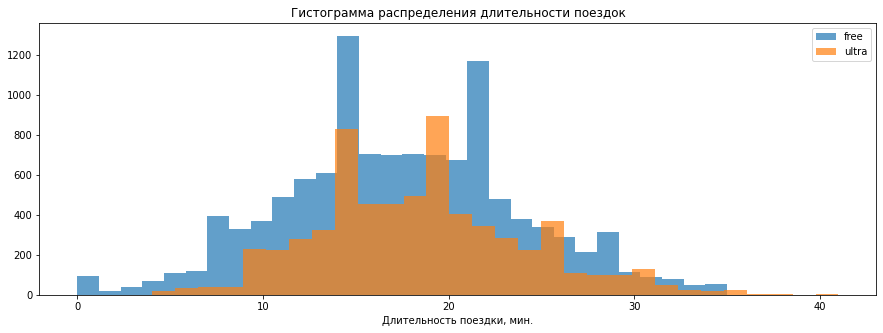

Средняя длительность поездки для пользователей без подписки 17 мин, а для пользователей с подпиской 19 мин


In [27]:
# Гистограмма длительности поездки для пользователей с подпиской и без
plt.figure(figsize=(15, 5))

plt.hist(df_free['duration'], bins=30, alpha=0.7, label='free')

plt.hist(df_ultra['duration'], bins=30, alpha=0.7, label='ultra')

plt.xlabel('Длительность поездки, мин.')
plt.title('Гистограмма распределения длительности поездок')
plt.legend()
plt.show()

# Расчет и вывод на экран средней длительности поездки для пользователей с подпиской и без
mean_duration_free = round(df_free['duration'].mean())
mean_duration_ultra = round(df_ultra['duration'].mean())
print(f'Средняя длительность поездки для пользователей без подписки {mean_duration_free} мин, а для пользователей с подпиской {mean_duration_ultra} мин')

---
## Задание 5. Подсчёт выручки
Данные о количестве и длительности поездок объединены с ценами и тарифами, а значит, теперь есть всё необходимое, чтобы рассчитать важный для бизнеса показатель — выручку.

### Задача 5.1 Данные сгруппированные по нужным колонкам
Сгруппируйте данные по следующим столбцам: `user_id`, `name`, `subscription_type`, `month`. Группировку призводите в датафрейме `df_gp`. В итоговом датафрейме `df_gp` должен сохраниться порядок агрегации изначальных столбцов и не должны использоваться групповые индексы (опция `as_index=False`).


In [33]:
df_gp = df.groupby(['user_id', 'name', 'subscription_type', 'month'], as_index=False)

### Задача 5.2 Подсчёт агрегированных метрик
Создайте новый датафрейм `df_agg`. В нём для каждой группы рассчитайте и добавьте в датафрейм следующие агрегированные значения, используя метод `agg()`:
- `total_distance` — сумма значений в столбце `distance`.
- `total_duration` — сумма значений в столбце `duration`.
- `rides_count` — количество элементов в столбце `duration`.
- `subscription_type` — первое значение в группе для столбца `subscription_type`.
- `minute_price` — первое значение в группе для столбца `minute_price`.
- `start_ride_price` — первое значение в группе для столбца `start_ride_price`.
- `subscription_fee` — первое значение в группе для столбца `subscription_fee`.

<details>
<summary>Открыть подсказку</summary>
В этом задании удобнее всего сделать агрегацию с использованием кортежей.
</details>

In [45]:
df_agg = df_gp.agg(
    total_distance=('distance', 'sum'),  # Сумма расстояний
    total_duration=('duration', 'sum'),  # Сумма продолжительности
    rides_count=('duration', 'count'),   # Количество поездок (по числу элементов в столбце 'duration')
    subscription_type=('subscription_type', 'first'),  # Первое значение типа подписки
    minute_price=('minute_price', 'first'),  # Первое значение для цены за минуту
    start_ride_price=('start_ride_price', 'first'),  # Первое значение для цены старта поездки
    subscription_fee=('subscription_fee', 'first')  # Первое значение для ежемесячной подписки
)


### Задача 5.3 Функция для подсчёта выручки
Создайте функцию `calculate_monthly_revenue(row)` для расчёта месячной выручки по формуле:

`monthly_revenue` = `start_ride_price` * `rides_count` + `minute_price` * `total_duration` + `subscription_fee`

В качестве входных данных функция будет принимать одну строку `row` датафрейма. Вспомните, как в таком случае обращаться к каждой колонке.

Здесь:
- `start_ride_price * rides_count` — выручка от начала каждой поездки.
- `minute_price * total_duration` — выручка за время использования.
- `subscription_fee` — фиксированная выручка от подписок.

In [46]:
def calculate_monthly_revenue(row):
    return (
        row['start_ride_price'] * row['rides_count'] +
        row['minute_price'] * row['total_duration'] +
        row['subscription_fee']
    )

### Задача 5.4 Создание столбца с месячной выручкой на пользователя
Создайте новый столбец с месячной выручкой на пользователя `monthly_revenue`. Для этого примените функцию `calculate_monthly_revenue(row)` к каждой строке агрегированного датафрейма `df_agg`.

In [47]:
df_agg['monthly_revenue'] = df_agg.apply(calculate_monthly_revenue, axis=1)

### Задача 5.5 Поиск пользователя с максимальной выручкой
Исследуйте полученные значения выручки. Найдите пользователя с максимальной суммарной выручкой за весь период наблюдения и для него выведите на экран `user_id`, имя, месяц, количество поездок и выручку за каждый из месяцев.

<details>
<summary>Открыть подсказку</summary>
Для найденного пользователя выведите колонки <code>user_id</code>, <code>name</code>, <code>month</code>, <code>rides_count</code>, <code>monthly_revenue</code>.
</details>

In [48]:
# Группировка по user_id и name, суммирование monthly_revenue
user_revenue = df_agg.groupby(['user_id', 'name'], as_index=False)['monthly_revenue'].sum()

# Нахождение пользователя с максимальной суммарной выручкой
max_user_id = user_revenue.loc[user_revenue['monthly_revenue'].idxmax(), 'user_id']

# Фильтрация данных для этого пользователя и выбор нужных колонок
max_user_data = df_agg[df_agg['user_id'] == max_user_id][['user_id', 'name', 'month', 'rides_count', 'monthly_revenue']]

print(max_user_data)

      user_id       name  month  rides_count  monthly_revenue
8877     1236  Александр      1            2              228
8878     1236  Александр      2            3              614
8879     1236  Александр      3            5              762
8880     1236  Александр      4            1              202
8881     1236  Александр      5            3              574
8882     1236  Александр      6            1              282
8883     1236  Александр      7            1              290
8884     1236  Александр      8            2              452
8885     1236  Александр      9            1              122
8886     1236  Александр     10            3              430
8887     1236  Александр     11            3              494
8888     1236  Александр     12            2              476


---
## Задание 6. Проверка гипотез

### Задача 6.1 Импорт библиотеки SciPy
Импортируйте библиотеку `scipy.stats` с сокращением `st`.

In [54]:
import scipy.stats as st 

### Задача 6.2 Вспомогательная функция для интерпретации результатов
Напишите вспомогательную функцию `print_stattest_results(p_value, alpha)`, которая будет интерпретировать результаты статистического теста на основе p-value и заданного уровня значимости (α-уровня). Функция должна решать, следует ли принять альтернативную гипотезу или сохранить нулевую гипотезу.

У функции два параметра:
- `p_value` (тип `float`) — значение p-value, полученное в результате выполнения статистического теста.
- `alpha` (тип `float`, необязательный, по умолчанию `alpha = 0.05`) — уровень значимости статистического теста, который используется как порог для принятия решения об отклонении нулевой гипотезы.

Если вы принимаете альтернативную гипотезу, нужно вывести сообщение:
`'Полученное значение p_value=<Введённое значение p_value> меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.'`

Если вы не можете опровергнуть нулевую гипотезу, нужно вывести сообщение: `'Полученное значение p_value=<Введённое значение p_value> больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.'`

Вызовите функцию для `p_value = 0.0001` и `p_value = 0.1`.

<details>
<summary>Открыть подсказку</summary>
В этом задании вам пригодятся знания f-строк из прошлых спринтов. Например, такой код позволит вам легко и красиво отформатировать и вывести переменную <code>x</code> — <code>print(f'Значение {x=}.')</code>.
</details>

In [55]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f'Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
    else:
        print(f'Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

print_stattest_results(p_value=0.0001)
print_stattest_results(p_value=0.1)

Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Задача 6.3 Длительность для пользователей с подпиской и без

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое.
- Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

Чтобы проверить эту гипотезу:
1. Используйте неагрегированные данные из датафреймов `df_ultra` и `df_free`, созданные на одном из прошлых шагов.
2. Используйте данные о продолжительности каждой поездки `duration` — отдельно для подписчиков и тех, у кого нет подписки.
3. Рассчитайте значение `p_value` для выбранной гипотезы, используя функции модуля `scipy.stats` и односторонний t-тест.
4. В качестве результата вызовите написанную функцию `print_stattest_results(p_value, alpha)`, передав ей рассчитанное значение `p_value`.
5. В конце дополнительно рассчитайте среднюю длительность поездки для тарифов `ultra` и `free`, округлив её до двух знаков после точки стандартной функцией `round()`.

In [56]:
ultra_duration = df_ultra['duration']
free_duration = df_free['duration']

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater') # Укажите подходящий инструмент здесь
p_value = results.pvalue
print_stattest_results(p_value)
ultra_mean_duration = round(ultra_duration.mean(), 2)
free_mean_duration = round(free_duration.mean(), 2)

print(f'Средняя длительность поездки тарифа Ultra {ultra_mean_duration}')
print(f'Средняя длительность поездки тарифа Free {free_mean_duration}')

Полученное значение p_value=3.1600689435611813e-35 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя длительность поездки тарифа Ultra 18.55
Средняя длительность поездки тарифа Free 17.39


### Задача 6.4 Длительность поездки: больше или меньше критического значения

Проанализируйте ещё одну важную продуктовую гипотезу. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров?

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза (Н0): Средняя дистанция поездки у пользователей с подпиской равна 3130 м.

- Альтернативная гипотеза (Н1): Средняя дистанция поездки у пользователей с подпиской больше 3130 м.

Чтобы проверить эту гипотезу:

1. Используйте неагрегированные данные о каждой поездке пользователей с подпиской из датафрейма `df_ultra`.

2. Используйте данные о дистанции каждой поездки `distance`.

3. Рассчитайте значение `p_value` для выбранной гипотезы, используя функции модуля `scipy.stats` и односторонний t-тест. Подумайте, как применить эту функцию, если необходимо проверить равенство с одним значением.

4. В качестве результата вызовите написанную функцию `print_stattest_results(p_value, alpha)`, передав ей рассчитанное значение `p_value`.

In [57]:
null_hypothesis = 3130
ultra_distance = df_ultra['distance']

results = st.ttest_1samp(ultra_distance, null_hypothesis, alternative='greater')
p_value = results.pvalue
print_stattest_results(p_value)

Полученное значение p_value=0.9195368847849785 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


### Задача 6.5 Прибыль от пользователей с подпиской и без
Проверьте гипотезу о том, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза (Н0): Средняя месячная выручка у пользователей с подпиской и без подписки одинаковая.
- Альтернативная гипотеза (Н1): Средняя месячная выручка у пользователей с подпиской выше, чем у пользователей без подписки.

Чтобы проверить эту гипотезу:
1. Используйте агрегированные данные из датафрейма `df_agg`, подготовленного на шаге 5.
2. Используйте исходные данные о месячной выручке от каждого пользователя — `monthly_revenue`.
3. Рассчитайте значение `p_value` для выбранной гипотезы, используя функции модуля `scipy.stats` и односторонний t-тест.
4. В качестве результата вызовите написанную функцию `print_stattest_results(p_value, alpha)`, передав ей рассчитанное значение `p_value`.
5. Дополнительно рассчитайте среднюю выручку для тарифов `ultra` и `free`, округлив её до целого стандартной функцией `round()`.

In [58]:
revenue_ultra = df_agg[df_agg['subscription_type'] == 'ultra']['monthly_revenue']
revenue_free = df_agg[df_agg['subscription_type'] == 'free']['monthly_revenue']

results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')
p_value = results.pvalue
print_stattest_results(p_value)

mean_revenue_ultra = round(revenue_ultra.mean())
mean_revenue_free = round(revenue_free.mean())

print(f'Средняя выручка подписчиков Ultra {mean_revenue_ultra} руб')
print(f'Средняя выручка подписчиков Free {mean_revenue_free} руб')

Полученное значение p_value=1.7274069878387966e-37 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя выручка подписчиков Ultra 359 руб
Средняя выручка подписчиков Free 322 руб


---
## Задание 7. Распределения

В компании возникла идея предлагать дополнительную скидку подписчикам, совершающим длительные поездки продолжительностью более 30 минут. Вас просят оценить долю таких поездок.

В одном из предыдущих заданий вы уже построили гистограмму распределения длительности поездок для выборки. Однако эти данные охватывают лишь часть пользователей всех самокатов, а вас интересуют возможные значения для всей генеральной совокупности. Учитывая, что у вас нет доступа ко всем данным о поездках, было решено смоделировать длительность поездки с помощью нормального распределения, используя в качестве параметров выборочное среднее и стандартное отклонение из доступных данных о поездках.

### Задача 7.1 Расчёт выборочного среднего и стандартного отклонения

1. Расчитайте среднюю длительность поездки и сохраните в переменную `mu`.
2. Вычислите стандартное отклонение длительности `duration` и сохраните в переменную `sigma`. Для вычисления стандартного отклонения можно применить метод `std()` к столбцу датасета.
3. Задайте значение переменной `target_time`, равное `30`. Эта переменная будет использоваться для последующего вычисления вероятности.
4. Выведите текстовый вывод по шаблону. При этом округлите оба значения до одного знака после точки стандартной функцией `round()`. Сами значения переменных должны остаться неимзменными для последующих задач.

In [59]:
# Вычисляем среднее значение
mu = df_ultra.agg({'duration': 'mean'})['duration']

# Вычисляем стандартное отклонение
sigma = df_ultra.agg({'duration': 'std'})['duration']

# Задаём целевое время
target_time = 30

# Делаем вывод
print(f'Средняя длительность поездки {round(mu, 1)}, стандартное отклонение {round(sigma)}.')

Средняя длительность поездки 18.5, стандартное отклонение 6.


### Задача 7.2 Вычисление значения функции распределения в точке (CDF)
Если вычислить значение функции распределения в точке, это позволит узнать вероятность того, что случайная величина примет значение меньше заданного либо равное ему. Соответственно, если вы хотите ответить на вопрос о вероятности поездки более 30 минут, потребуется использовать CDF.

1. Используйте функцию `norm()` из библиотеки SciPy для создания нормального распределения с параметрами `mu` и `sigma`.

2. Примените метод `cdf()` к целевому времени `target_time` для получения вероятности того, что случайная величина будет меньше этого значения или равна ему. Полученное значение сохраните в переменную `prob`, округлив до трёх знаков после точки стандартной функцией `round()`.
3. Выведите на экран текстовый ответ по шаблону.

In [60]:
# Вычисляем вероятность того, что случайная величина будет меньше указанного значения или равна ему

duration_norm_dist  = st.norm(mu, sigma)
prob = round(1 - duration_norm_dist.cdf(target_time), 3) # Используем CDF для нахождения накопленной вероятности

print(f'Вероятность поездки более 30 минут {prob}')

Вероятность поездки более 30 минут 0.02


### Задача 7.3 Вероятность для интервала (CDF)
Коллеги посчитали, что процент пользователей, для которых будет показана скидка, недостаточно большой и вряд ли поможет в увеличении лояльности клиентов. Дополнительно вас просят проверить, какой процент пользователей совершает поездки в интервале от 20 до 30 минут. Возможно, именно для них стоит провести промоакцию?

Для этого:

1. Создайте переменные `low` и `high`, указывающие на начало и конец интересующего временного интервала. В этом случае они равны 20 и 30 минут.
2. Используйте кумулятивную функцию распределения (CDF) для объекта `duration_norm_dist`, чтобы вычислить вероятность достижения верхней границы (`high`) и нижней границы (`low`).
3. Вычислите вероятность попадания в интервал, округлите до трёх знаков после точки стандартной функцией `round()` и сохраните в переменную `prob_interval`.
4. Выведите ответ, используя шаблон.

In [61]:
# Определяем границы интервала
low = 20
high = 30

# Вычисляем вероятность попадания в интервал
prob_interval = round(duration_norm_dist.cdf(high) - duration_norm_dist.cdf(low), 3)

# Выводим результат
print(f'Вероятность того, что пользователь совершит поездку длительностью от {low} до {high} минут: {prob_interval}')

Вероятность того, что пользователь совершит поездку длительностью от 20 до 30 минут: 0.377


### Задача 7.4 Определение критической дистанции поездок (PPF)
Длительные поездки могут негативно сказываться на сроке службы самоката. В связи с этим принято решение установить критическую дистанцию, превышение которой будет сопровождаться дополнительной платой. Для этого необходимо определить расстояние, которое превышается только в 10% поездок (90-й процентиль).

Ваша задача — смоделировать распределение длительности поездок, предполагая, что оно подчиняется нормальному закону, и рассчитать критическую дистанцию, ниже которой находится 90% всех поездок.

Для этого:
1. Рассчитайте среднюю дистанцию поездки для всех пользователей из датафрейма `df` (с подпиской и без) и сохраните в переменную `mu`.
2. Вычислите стандартное отклонение дистанции поездки `distance` и сохраните в переменную `sigma`. Для вычисления стандартного отклонения можно применить метод `std()` к столбцу датасета.
3. Задайте значение переменной `target_prob`, равное `0.90`. Эта переменная будет использоваться для последующего вычисления критической дистанции.
4. Создайте объект нормального распределения `distance_norm` с заданными значениями `mu` и `sigma`.
5. Примените к созданному нормальному распределению `distance_norm` метод `ppf()` и в качестве аргумента передайте целевую вероятность `target_prob`. Полученное значение сохраните в переменную `critical_distance`.
6. Выведите ответ, используя шаблон.



In [62]:
# Вычисляем среднее значение
mu = df['distance'].mean()

# Вычисляем стандартное отклонение
sigma = df['distance'].std()

# Вероятность, для которой хотим найти значение (90% случаев)
target_prob = 0.90

# Создаём объект нормального распределения
distance_norm = st.norm(mu, sigma)

# Рассчитываем критическую дистанцию для заданного процентиля поездок
critical_distance = distance_norm.ppf(target_prob)

print(f'{100 * target_prob} % поездок имеют дистанцию ниже критического значения {critical_distance:.2f} М.')

90.0 % поездок имеют дистанцию ниже критического значения 4501.94 М.


Поздравляем! Вы продемонстрировали глубокое понимание статистических методов и мастерски справились с задачами, используя CDF и PPF. Ваш анализ помог выявить ключевые характеристики распределения данных и определить критические значения, что очень ценно для принятия эффективных бизнес-решений.